<a href="https://colab.research.google.com/github/Yoshibansal/image-video-processing/blob/main/Edge%20Detection/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Edge Detection in Architecture

In [21]:
!git clone https://github.com/Yoshibansal/image-video-processing.git

Cloning into 'image-video-processing'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [22]:
!pwd

/content


In [23]:
%cd image-video-processing/Edge\ Detection
!pwd

/content/image-video-processing/Edge Detection
/content/image-video-processing/Edge Detection


In [25]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [34]:
path_edge = 'Edge Detection'

In [39]:
images = glob.glob(path_edge + '/*.*')

In [40]:
images

['Edge Detection/building.jpg',
 'Edge Detection/csbldg.jpg',
 'Edge Detection/House.jpg',
 'Edge Detection/gates.png']

In [124]:
number_of_images = len(images)

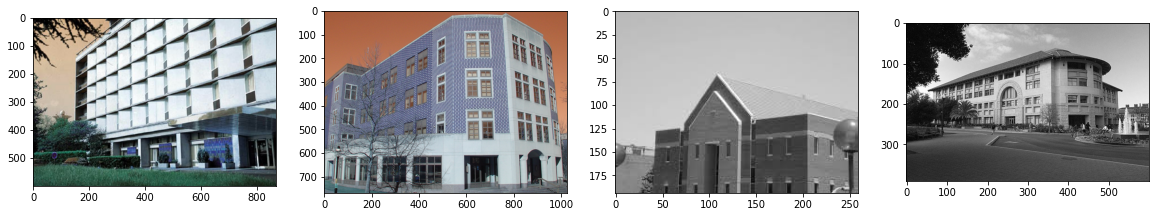

In [129]:
i = 1
plt.subplots(figsize=(20, 4))
for file in images:
  a = cv2.imread(file)
  plt.subplot(1, number_of_images, i)
  plt.imshow(a)
  i += 1
plt.show()

In [130]:
#@title Choose color map
cmap = "Greys" #@param ["binary", "Greys"]
def imshow(title, image, i):
  plt.subplot(1, 4, i)
  plt.title(title)
  plt.imshow(image, cmap=cmap)

In [60]:
def processing(imagePath):
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, (3, 3), 0)
  return image, blurred

In [55]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [56]:
def outputs(blurred):
  wide = cv2.Canny(blurred, 10, 200)
  tight = cv2.Canny(blurred, 225, 250)
  auto = auto_canny(blurred)
  return wide, tight, auto

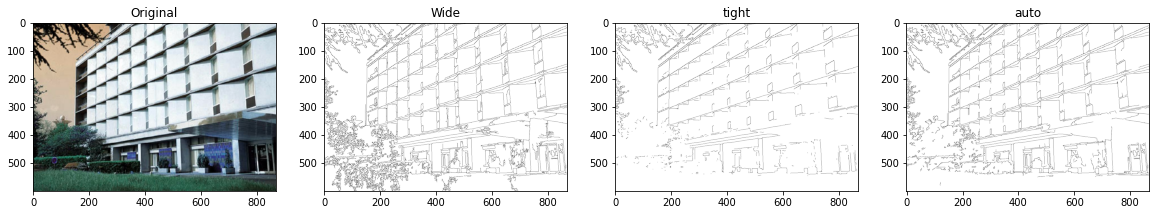

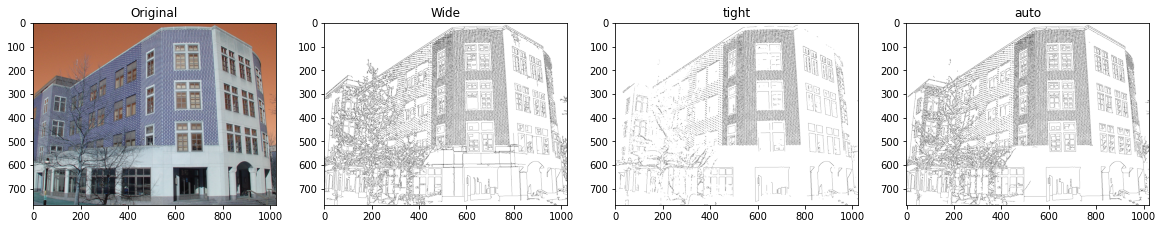

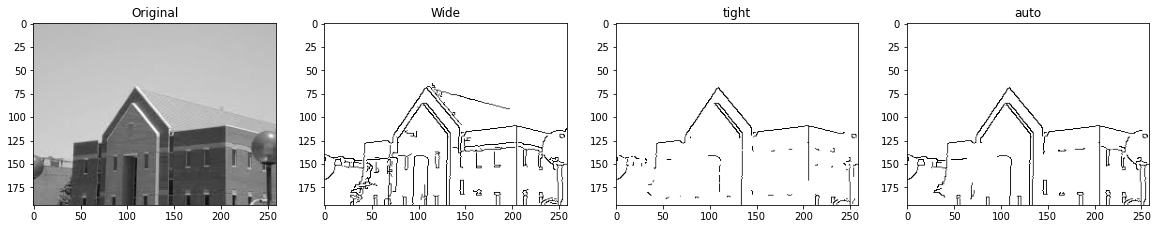

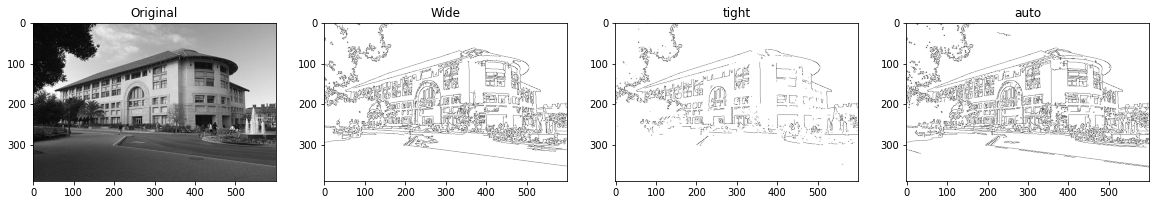

In [123]:
for file in images:
  image, blurred = processing(file)
  wide, tight, auto = outputs(blurred)
  plt.subplots(figsize=(20, 4))
  imshow("Original", image, 1)
  imshow("Wide", wide, 2)
  imshow("tight", tight, 3)
  imshow("auto", auto, 4)
  plt.show()

Using Convolution -> Kernel

In [91]:
cv2.imread(images[0]).shape

(600, 868, 3)

In [136]:
image = cv2.imread(images[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [108]:
edge_filter = np.array([[-1, -1, -1],
               [-1, 8, -1],
               [-1, -1, -1]])

In [137]:
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

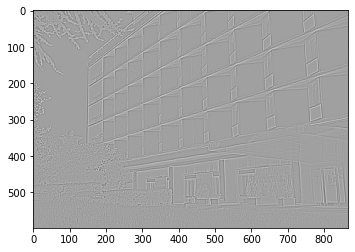

In [139]:
plt.imshow(convolution2d(gray, edge_filter), cmap='Greys')

## License Plate Localization

In [413]:
import numpy as np
import cv2
import imutils

In [143]:
!pwd

/content/image-video-processing/Edge Detection


In [144]:
path = 'small sample'

In [148]:
images = glob.glob(path + '/*.*')

In [ ]:
images

In [405]:
# def canny(image, p_img):
#   plt.subplots(figsize=(20, 4))

#   # apply binary thresholding
#   ret, thresh = cv2.threshold(p_img, thresh=200, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#   plt.subplot(1, 3, 1)
#   plt.imshow(thresh)

#   # Find Canny edges
#   edged = cv2.Canny(thresh, 30, 200)

#   # Finding Contours
#   # Use a copy of the image e.g. edged.copy() since findContours alters the image
#   contours, hierarchy = cv2.findContours(image=edged.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

#   contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
  
#   plt.subplot(1, 3, 2)
#   plt.imshow(edged)
#   print("Number of Contours found = " + str(len(contours)))
  
#   # NumberPlateCnt = None
#   # found = False
  
#   # for c in contours:
#   #     peri = cv2.arcLength(c, True)
#   #     approx = cv2.approxPolyDP(c, 0.018 * peri, True)
#   #     if len(approx) == 4:
#   #         found = True
#   #         NumberPlateCnt = approx
#   #         break
  
#   # for i in range(len(contours)):
#   #     hull = cv2.convexHull(contours[i])
#   #     # Draw all contours
#   #     # -1 signifies drawing all contours
#   #     cv2.drawContours(image=image, contours=[hull], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

#   cv2.drawContours(image=image, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2)
#   # n_img = cv2.drawContours(image, [NumberPlateCnt], -1, (0, 0, 255), 3)
#   # Display the final convex hull image
#   plt.subplot(1, 3, 3)
#   plt.imshow(image, cmap='binary')
#   plt.show()

In [464]:
def canny(img):
  plt.subplots(figsize=(20, 4))

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.subplot(1, 4, 1)
  plt.imshow(gray)

  gray = cv2.bilateralFilter(gray, 11, 17, 17)
  plt.subplot(1, 4, 2)
  plt.imshow(gray)

  edged = cv2.Canny(gray, 30, 200)
  plt.subplot(1, 4, 3)
  plt.imshow(edged)

  nts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(nts)
  cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
  screenCnt = None

  for c in cnts:
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.018 * peri, True)
      if len(approx) == 4:
        screenCnt = approx
        break
  try:
   if (screenCnt == None):
    return "Not Found"
  except:
    n_img=cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
    n_img =cv2.resize(n_img,(500,300))
    plt.subplot(1, 4, 4)
    plt.imshow(n_img)

  return n_img

In [465]:
len(images)

27

In [466]:
#@title Index
index = 6 #@param {type:"slider", min:0, max:27, step:1}

def load_image():
  # Let's load a image
  image = cv2.imread(images[index])
  plt.imshow(image)
  plt.show()
  return image

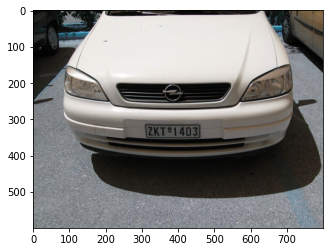

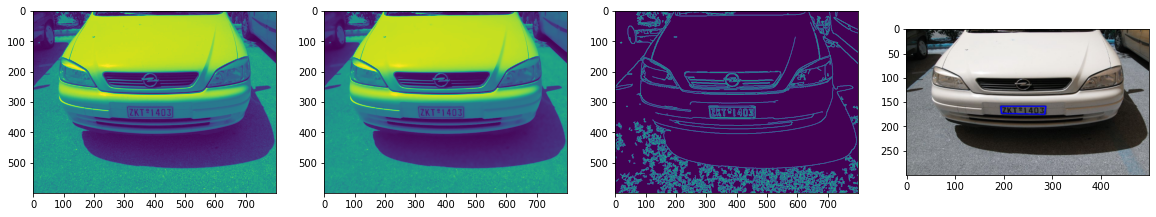

In [469]:
image = load_image()

# Grayscale
img = canny(image)

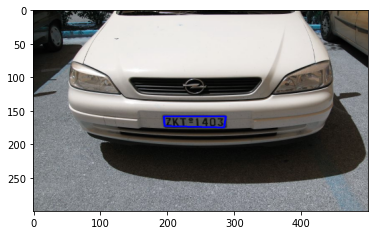

In [470]:
plt.imshow(img)
plt.show()